# SOM Training on RGB Colors Dataset


In [1]:
import torch
import matplotlib
import numpy as np
import random
from fastsom import *

### Creating the DataBunch

In [2]:
def colors():
    # Set color dataset
    colors = np.empty((0,3), float)
    colors = np.append(colors, np.array([[0, 0, 0]]), axis=0)
    colors = np.append(colors, np.array([[1, 1, 1]]), axis=0)
    for i in range(20):
        colors = np.append(colors, np.array([[0, 0, random.random()]]), axis=0)
        colors = np.append(colors, np.array([[0, random.random(), 0]]), axis=0)
        colors = np.append(colors, np.array([[random.random(), 0, 0]]), axis=0)
        colors = np.append(colors, np.array([[1, 1, random.random()]]), axis=0)
        colors = np.append(colors, np.array([[1, random.random(), 1]]), axis=0)
        colors = np.append(colors, np.array([[random.random(), 1, 1]]), axis=0)
        colors = np.append(colors, np.array([[0, random.random(), random.random()]]), axis=0)
        colors = np.append(colors, np.array([[random.random(), random.random(), 0]]), axis=0)
        colors = np.append(colors, np.array([[1, random.random(), random.random()]]), axis=0)
        colors = np.append(colors, np.array([[random.random(), random.random(), 1]]), axis=0)
        colors = np.append(colors, np.array([[random.random(), random.random(), random.random()]]), axis=0)
    x = torch.tensor(colors)
    y = None
    labels = ['Red', 'Green', 'Blue']
    
    return x, y, labels

In [3]:
x, y, labels = colors()

Let's create an `UnsupervisedDataBunch` with shuffle sampling and variance+std normalization:

In [4]:
db = UnsupervisedDataBunch(x, valid=0.05, sampler='shuffle', bs=50)

In [5]:
d = db.train_ds.tensors[0]
d.mean(0), d.std(0)

(tensor([ 6.5556e-17, -2.5799e-16,  2.6540e-16], dtype=torch.float64),
 tensor([1.0000, 1.0000, 1.0000], dtype=torch.float64))

### Creating the Learner

In [7]:
size = (10, 10)

learn = SomLearner(db, 
    size=size,
    lr=[0.6, 0.3, 0.1], 
    metrics=[topologic_err],
    visualize=['weights'],
    trainer=ExperimentalSomTrainer)

### Training the model

<IPython.core.display.Javascript object>


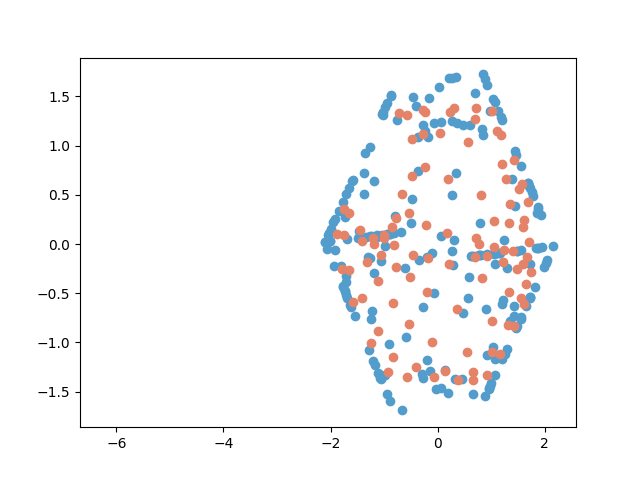

epoch,train_loss,valid_loss,topologic_err,time
0,1.707253,0.967120,8.000000,00:00
1,1.361712,0.802000,8.000000,00:00
2,1.201261,0.821195,8.000000,00:00
3,1.104600,0.815989,7.000000,00:00
4,1.044680,0.818435,7.000000,00:00
5,1.005196,0.846537,7.000000,00:00
6,0.979534,0.845026,7.000000,00:00
7,0.960020,0.835419,7.000000,00:00
8,0.941492,0.835411,7.000000,00:00
9,0.932829,0.826630,7.000000,00:00


In [8]:
%matplotlib notebook
learn.fit(100)

<IPython.core.display.Javascript object>


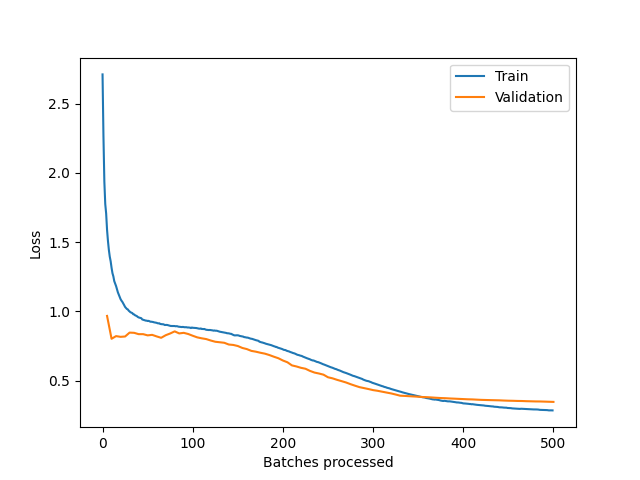

In [9]:
learn.recorder.plot_losses()

### Interpretation

The `SomInterpretation` class provides visualization utilities, to better understand the output of the training process.

In [14]:
interp = SomInterpretation.from_learner(learn)

`show_hitmap` displays a heatmap of hit counts for each map position:

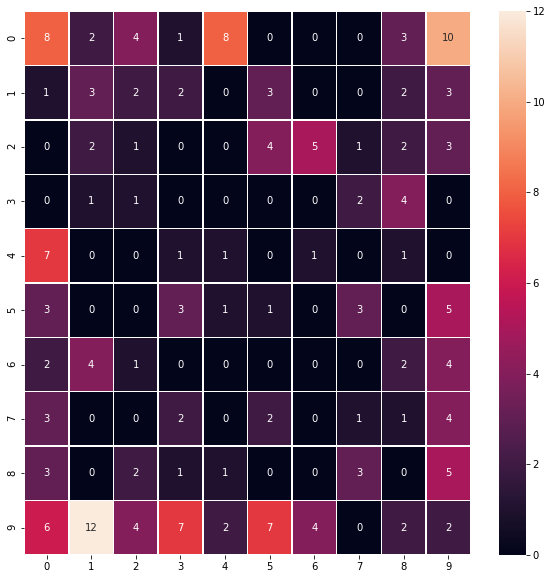

In [15]:
%matplotlib inline
interp.show_hitmap()

`show_feature_heatmaps` shows the per-feature value distribution over the SOM codebooks:

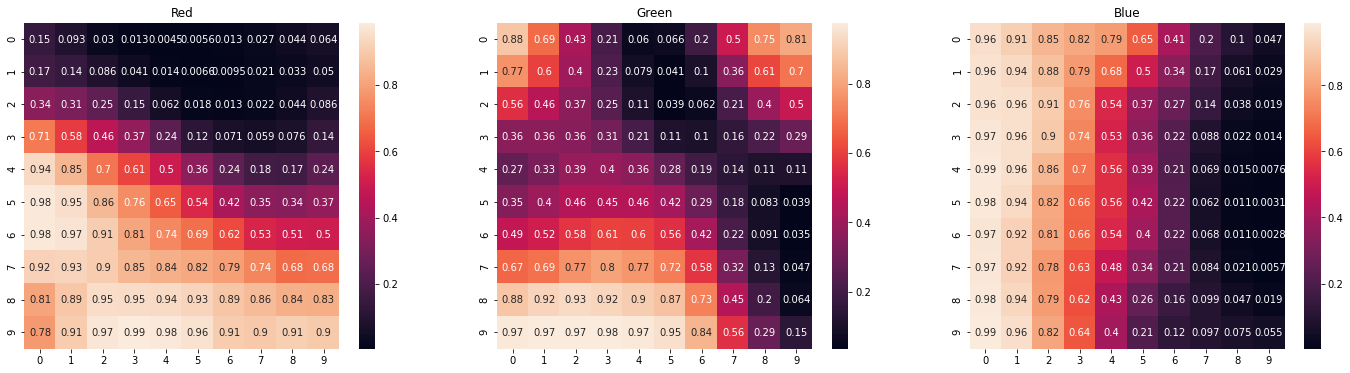

In [16]:
%matplotlib inline
interp.show_feature_heatmaps(cont_labels=labels, recategorize=False)

`show_weights` displays a three-dimensional PCA of the SOM codebook in an RGB image:

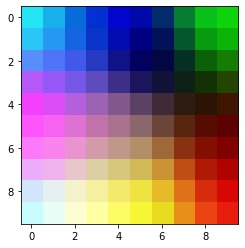

In [19]:
%matplotlib inline
interp.show_weights()